In [3]:
#Cargando librerías 

from IPython.display import clear_output
import importlib

from PIL import Image
import matplotlib.pyplot as plt
import scipy as sp
#from scipy import ndimage as ndi
import numpy as np
import pandas as pd
import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.regionGrowing as rg
importlib.reload(rg)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)


from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import rank

from skimage.draw import line


In [4]:
fn = "linz_with_init_net.txt"
me.createProject(fn)

Read File: ../experiments/linz_with_init_net.txt
Creating Directory in: ../experiments/linz_experiment_with_initial_positions/
Creating Directory ../experiments/linz_experiment_with_initial_positions/results/
Creating Directory: ../experiments/linz_experiment_with_initial_positions/semivariances/
Copy linz_with_init_net.txt -> ../experiments/linz_experiment_with_initial_positions/linz_with_init_net.txt


In [5]:
setup = me.readConfigFile(fn)

In [6]:
flat_means_decrease = bool(setup['flatness_means_decrease'])
print(flat_means_decrease)

True


In [7]:
#cargamos imagenes en luminance e importance

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]

img = ilumina
im1 = np.array(Image.open(img))



In [8]:
net = setup["init_fixed_net"]

In [9]:
#NTLI: luminance
NTLI = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles, invert = True)

th = int(setup["desaturation_th"])

In [10]:
setup["input_evm"]

'linz_prioridades'

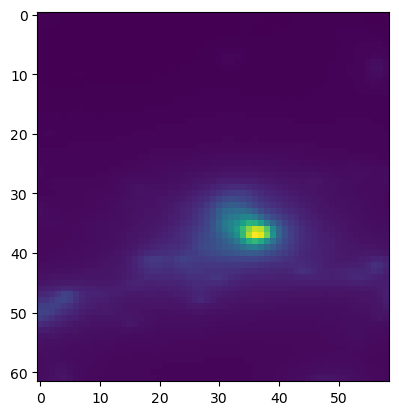

In [11]:

plt.imshow(NTLI)

In [12]:
#NTLI[tuple(net[4])] = np.max(NTLI)

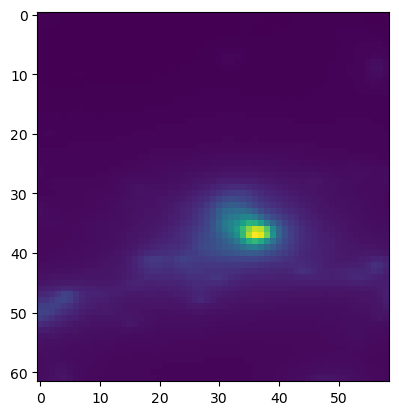

In [13]:
plt.imshow(NTLI)

In [14]:
np.max(NTLI)

5.0428257

In [15]:
EAM[EAM==255]=1.0

EAMC = np.copy(EAM)

In [16]:
for n in net:
    EAMC[tuple(n)]=0

array([  0, 254], dtype=uint8)

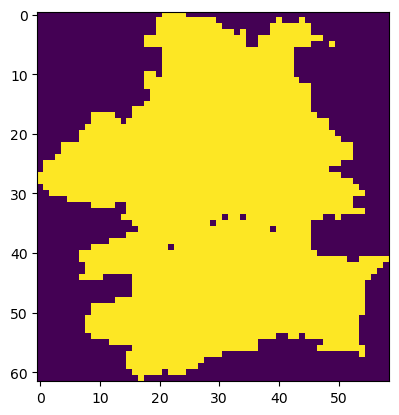

In [17]:
plt.imshow(EAMC)

np.unique(EAMC)

In [18]:
DNTLI, distance = ps.desaturate(NTLI, th = th)

In [19]:
#smoothing parameters
sigma_y = setup['filterg_sy']
sigma_x =setup['filterg_sx']
sigma = [sigma_y, sigma_x]

FDNTLI = sp.ndimage.filters.gaussian_filter(NTLI, 
                                            sigma, 
                                            mode = setup['gaussian_mode'])


#we filter only the values greater than 22
th = setup['neglect_values']/8
FDNTLI = (FDNTLI>=th)*FDNTLI

nonsatc = np.copy(FDNTLI)

#
#nonsatc[si] = 0
#plt.imshow(nonsatc)
#plt.show()

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_4108/1932599856.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  FDNTLI = sp.ndimage.filters.gaussian_filter(NTLI,


In [21]:
fxn = setup["init_fixed_net"]

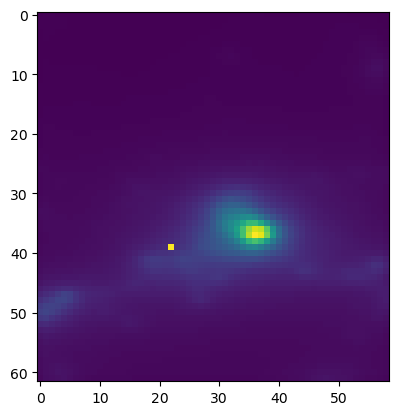

In [22]:
si = tuple(fxn[4])

FDNTLI_LINZ = np.copy(FDNTLI)
FDNTLI_LINZ[si]=np.max(FDNTLI_LINZ)

plt.imshow(FDNTLI_LINZ)


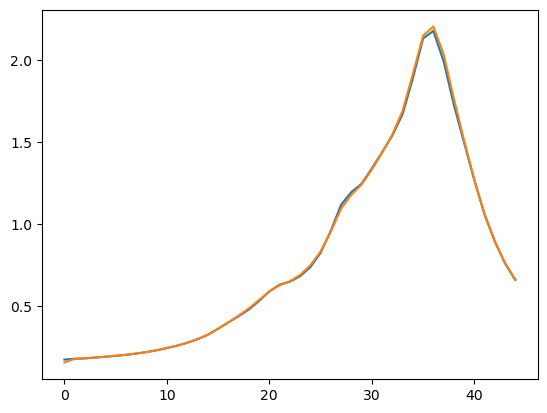

In [23]:
r = si[1]
#plt.plot(NTLI[si[0],si[1]-r:si[1]+r+1])
plt.plot(NTLI[si[0], si[1] - r:si[1] + r + 1])
plt.plot(FDNTLI[si[0], si[1] - r:si[1] + r + 1])
#plt.vlines(si[1],0,np.max(nonsat2[si[0],:]))


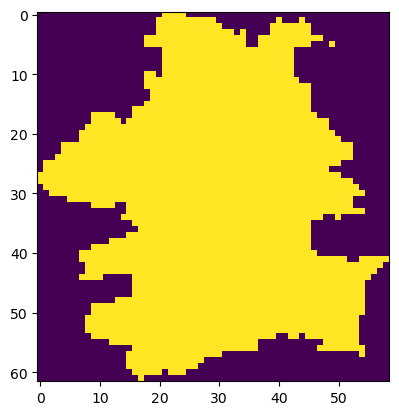

In [24]:
plt.imshow(EAM)

In [25]:
EAM = EAM.astype(float)

In [26]:
coords = ps.get_coords(FDNTLI>setup["neglect_values"])

In [27]:
#fill the required params
#si = (28,19)

params = {"type": "semivar", 
          "atol": setup["tolerance_angle"], 
          "dtol": setup["tolerance_distance"]}


sv = np.zeros(FDNTLI.shape)

#tell to the class, which object is going to be used to make the semivariogram

rG = rg.rGrowing(FDNTLI)

rG.setParams(params)

n = len(coords)

#ncords x imagesize m x n
image_size = (n, FDNTLI.shape[0]*FDNTLI.shape[1])
allsemivariances = np.zeros(image_size)
allmask = np.zeros(image_size)


df = pd.DataFrame()



In [29]:
si

(39, 22)

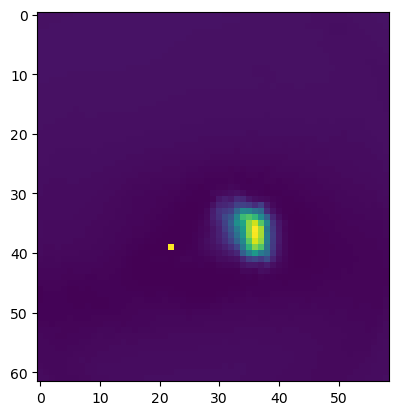

In [28]:
sv = rG.makeSemivarianceMap(si)
svc = np.copy(sv)
svc[si] = np.max(sv)
plt.imshow(svc)

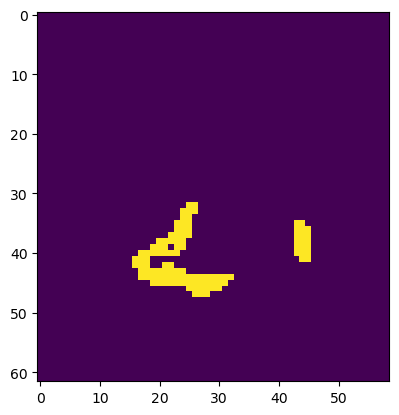

In [40]:
sv[si]=5
plt.imshow(sv<=0.01)

In [195]:
svf = sv.flatten()

In [196]:
si

(35, 29)

In [197]:
masksv = ps.constructMask(si, sv, flat_means_decrease)
masksv[si] = 0

In [1]:
plt.imshow(masksv)

NameError: name 'plt' is not defined

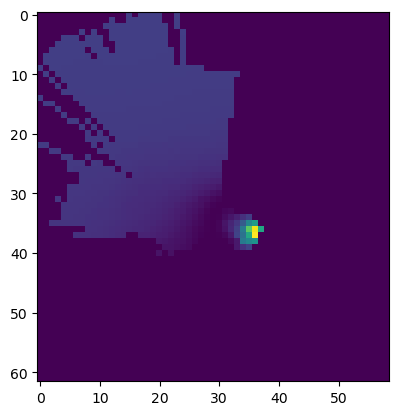

In [202]:
plt.imshow(masksv*svc)


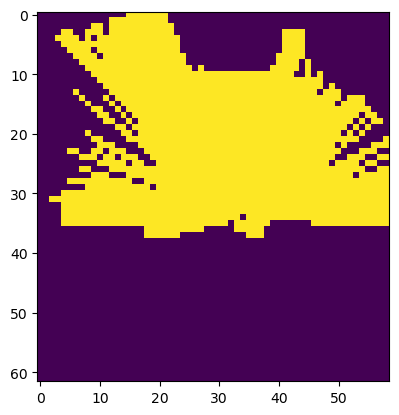

In [170]:
plt.imshow(masksv)

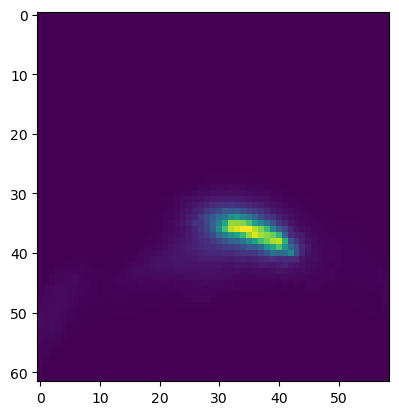

In [130]:
plt.imshow(sv)

In [131]:
len(coords)

1607

In [132]:
sv.shape[0]*sv.shape[1]

3658

In [133]:
si = (58, 28)

In [134]:
print("coords:", si)
    
clear_output(wait = True)
s = "{percen: 1.2f}%"
print(s.format(percen = 100*(i + 1)/n))
    
si = tuple(si)

#generate a semivariance sv map
sv = rG.makeSemivarianceMap(si)
    
#flattne sv to store it in a dataframe
semivar_brat = sv.flatten()
    
#construct a mask of sv and then flatten it
semivar_brat_mask = ps.constructMask(si, sv, flat_means_decrease).flatten()

NameError: name 'i' is not defined

TypeError: Invalid shape (6396,) for image data

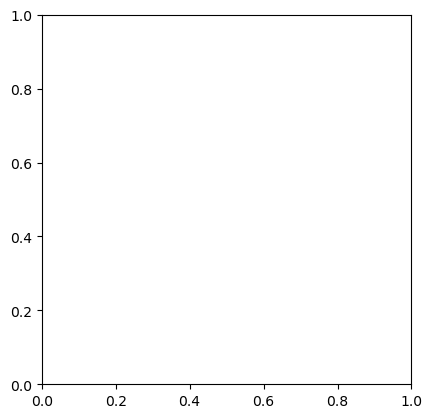

In [71]:
plt.imshow(semivar_brat_mask)

In [135]:
for i, si in enumerate(coords):
    print("coords:", si)
    
    clear_output(wait = True)
    s = "{percen: 1.2f}%"
    print(s.format(percen = 100*(i + 1)/n))
    
    si = tuple(si)

    #generate a semivariance sv map
    sv = rG.makeSemivarianceMap(si)
    
    #flattne sv to store it in a dataframe
    allsemivariances[i] = sv.flatten()
    
    #construct a mask of sv and then flatten it
    allmask[i] = ps.constructMask(si, sv, flat_means_decrease).flatten()

 100.00%


In [136]:
svc = np.copy(sv)

In [137]:
svc[tuple(si)] = np.max(svc)

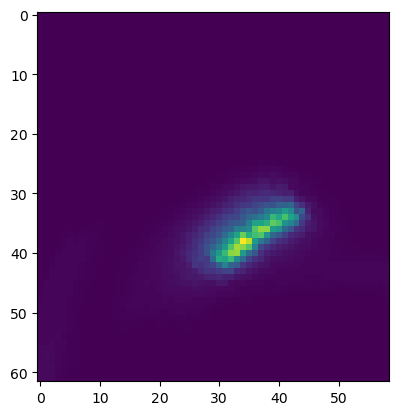

In [138]:
plt.imshow(sv)

In [139]:
maskf = ps.constructMask(si, sv, flat_means_decrease).flatten()

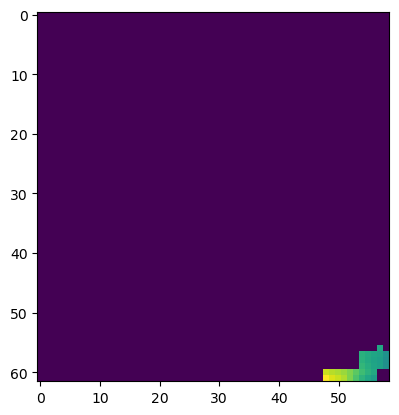

In [141]:
plt.imshow(maskf.reshape(sv.shape)*FDNTLI_LINZ)

In [142]:
P = ps.perimeter(sv)

In [143]:
FDNTLI.shape

(62, 59)

In [144]:
sv.shape

(62, 59)

In [145]:
for pix in P:
    sv[pix]

In [146]:
pix

(61, 58)

In [147]:
np.shape(sv)

(62, 59)

In [148]:
si = (58, 28)

In [149]:
#path to save collection of semivariances

prefix_path = (cfg.experiment + setup["experiment_id"] 
          + setup["folder_semivariances"] 
          + setup["output_semivariances"])


filesv = ( prefix_path + ".csv")

print("Semivariances saved at: ", filesv)

#filesvmask = (cfg.experiment + setup["experiment_id"] 
#              + setup["folder_semivariances"] 
#              + setup["output_semivariances"] 
#              + "mask.csv")


#path to save collection of masks
#each semivariance map is associated with a mask.
#mask defines the region of influence

filesvmask = (prefix_path + "mask.csv")

print("Semivariances mask saved to: ", filesvmask)

Semivariances saved at:  ../experiments/linz_experiment_with_initial_positions/semivariances/semivariance050512022.csv
Semivariances mask saved to:  ../experiments/linz_experiment_with_initial_positions/semivariances/semivariance050512022mask.csv


In [150]:


df_semivariance = pd.DataFrame(allsemivariances)
df_semivariance.insert(0, "coordsy", coords[:,0]) 
df_semivariance.insert(1, "coordsx", coords[:,1])
df_semivariance.to_csv(filesv)

df_semivariance_mask = pd.DataFrame(allmask)
df_semivariance_mask.insert(0, "coordsy", coords[:,0]) 
df_semivariance_mask.insert(1, "coordsx", coords[:,1])
df_semivariance_mask.to_csv(filesvmask)

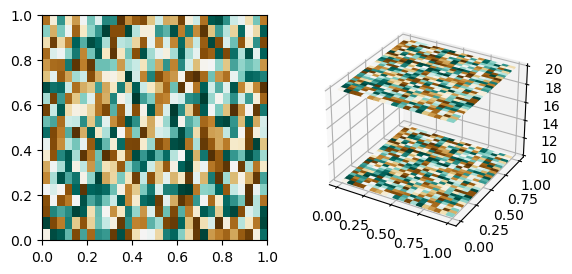

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,30))

# create some dummy data (20 x 20) for the image
data = np.random.random((20, 30))

# create vertices for a rotated mesh (3D rotation matrix)
X = np.sqrt(1./3) * xx + np.sqrt(1./3) * yy
X = xx
Y = -np.sqrt(1./3) * xx + np.sqrt(1./3) * yy
Y = yy
Z = np.ones((30,20))*10
Z1 = np.ones((30,20))*20

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.BrBG(data.T), shade=False)
ax2.plot_surface(X, Y, Z1, rstride=1, cstride=1, facecolors=plt.cm.BrBG(data.T), shade=False)